In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import psycopg2
import pandas.io.sql as sqlio

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
sys.path.append(os.path.abspath(os.path.join('../src')))

In [67]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [68]:
from preprocessing import PreProcess
from overview import Overview 
overview = Overview()
preProcess = PreProcess()
from plot import Plot
pl = Plot()

In [45]:
conn = psycopg2.connect(dbname='telecom', user='postgres', host='localhost', password='Nigielove_21')

In [46]:
cur = conn.cursor()

In [47]:
sql = """ SELECT * FROM public.xdr_data  """
data_from_postgres = sqlio.read_sql_query(sql, conn)

In [134]:
# Close the cursor and the connection
cur.close()
conn.close()

In [49]:
data_from_postgres.to_csv('../data/data_from_postgres.csv', index=False)

In [104]:
df_data = data_from_postgres.copy()

In [105]:
df_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [106]:
# number of data points
print(f" There are {df_data.shape[0]} rows and {df_data.shape[1]} columns")

 There are 150001 rows and 55 columns


In [107]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [76]:
# Count missing values
df_data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [77]:
## Checking for doublicate values

In [108]:
duplicated_entries = df_data[df_data.duplicated()]
duplicated_entries.shape

(0, 55)

<function matplotlib.pyplot.show(close=None, block=None)>

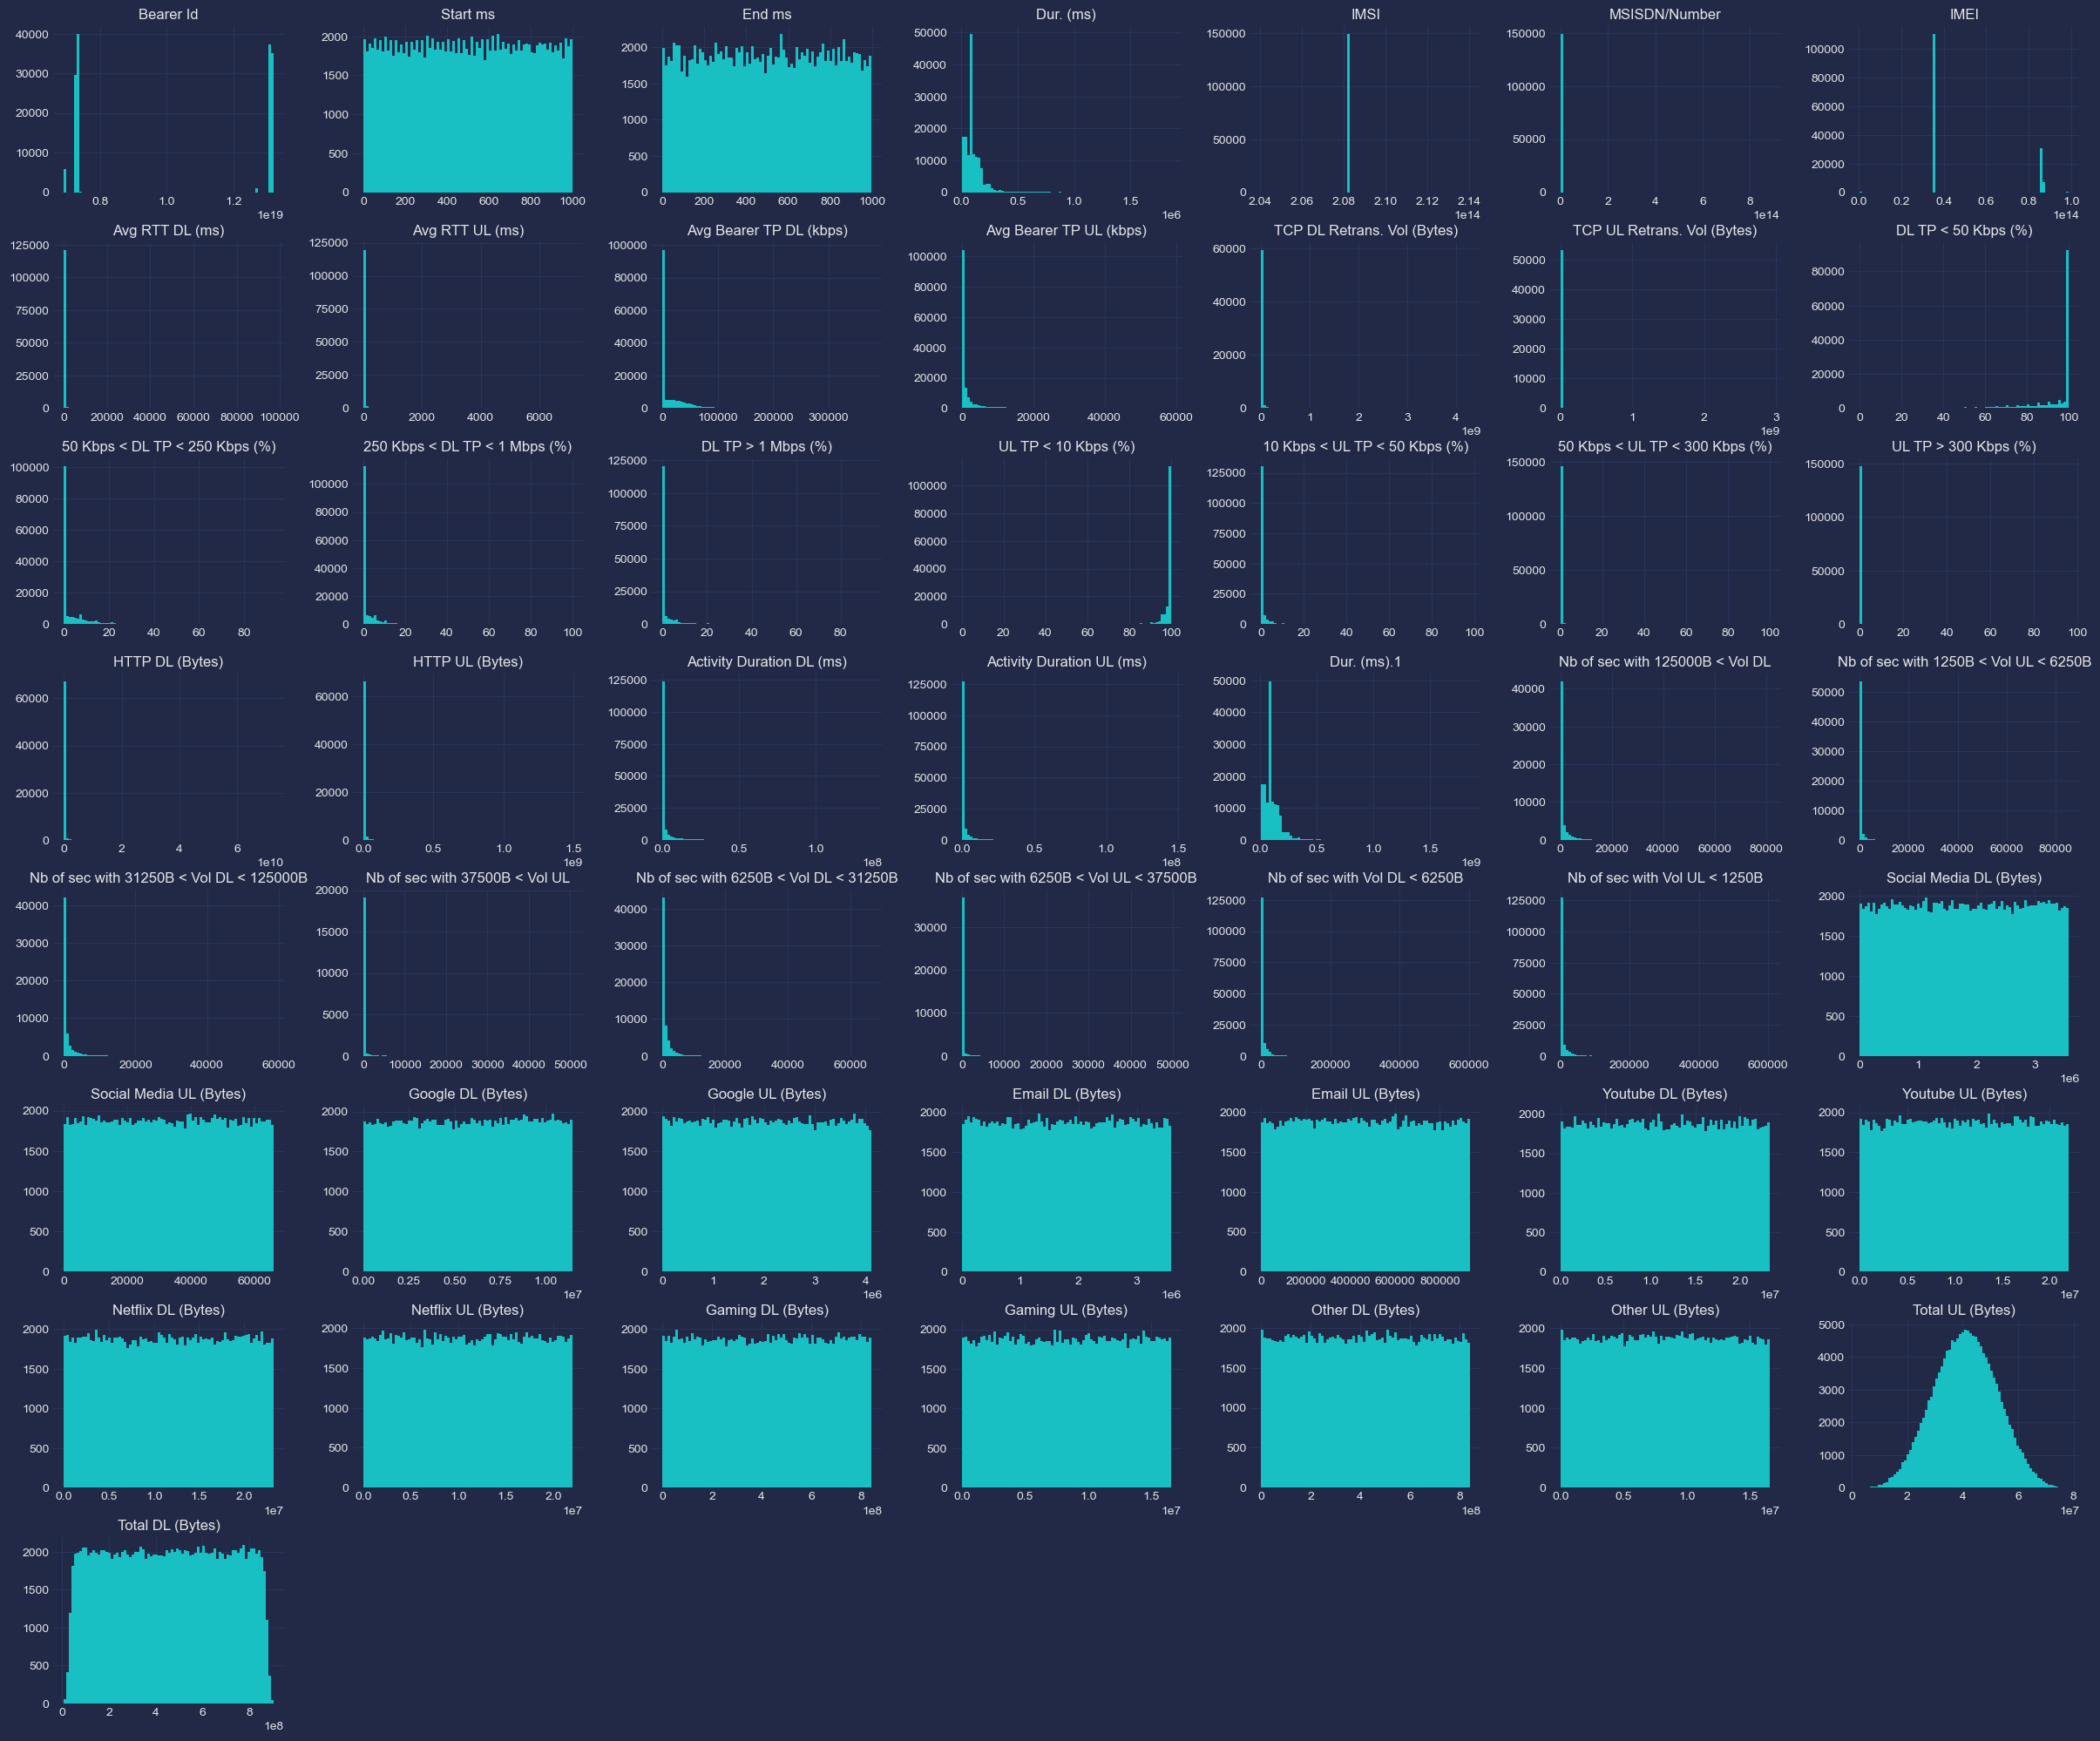

In [109]:
df_data.hist(bins=80, figsize=(30,25))
plt.savefig('../assets/pre_1.png')
plt.show

In [110]:
overview.get_skewness(df_data)

Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

#### It can be seen that most of the data are skewed either positvely or negatively.

In [111]:
## here we observ that the some of the feaures are skew.

This distribution has skew 332.15585581939644
This distribution has kurtosis 115844.50542866603


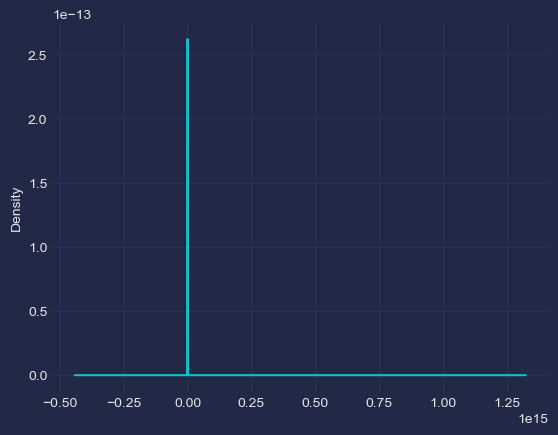

In [112]:
df_data['MSISDN/Number'].plot(kind='density')
print('This distribution has skew', df_data['MSISDN/Number'].skew())
print('This distribution has kurtosis', df_data['MSISDN/Number'].kurt())

#### Getting percentage of missing values

In [113]:
total_missing_value = overview.percent_missing(df_data)
print(f'The percentage of missing values in the telecom data set is {total_missing_value}% of the total')


The percentage of missing values in the telecom data set is 12.5% of the total


### Number and percentage of missing values for each column

In [114]:
df_data[["TCP UL Retrans. Vol (Bytes)","TCP DL Retrans. Vol (Bytes)"]] = preProcess.fill_nulls_with_method(df_data[["TCP UL Retrans. Vol (Bytes)","TCP DL Retrans. Vol (Bytes)"]], 'ffill')    

In [115]:
missing_values_result = preProcess.missing_values_percentage(df_data)
missing_values_result

,Total Missing Values,Percentage Missing
Nb of sec with 37500B < Vol UL,130254,86.835421
Nb of sec with 6250B < Vol UL < 37500B,111843,74.561503
Nb of sec with 125000B < Vol DL,97538,65.024900
Nb of sec with 31250B < Vol DL < 125000B,93586,62.390251
Nb of sec with 1250B < Vol UL < 6250B,92894,61.928920
Nb of sec with 6250B < Vol DL < 31250B,88317,58.877607
HTTP UL (Bytes),81810,54.539636
HTTP DL (Bytes),81474,54.315638
Avg RTT DL (ms),27829,18.552543
Avg RTT UL (ms),27812,18.541210


In [116]:
missing_values_result.shape

(55, 2)

#### Clean the column names

In [117]:
df_data= preProcess.clean_feature_name(df_data)

In [118]:
df_data.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Drop dublicates

In [119]:
df_data.shape

(150001, 55)

In [120]:

df_data.drop_duplicates(inplace=True)

In [121]:
df_data.shape

(150001, 55)

#### No duplicate values found

## Handeling missing values

### 1. Delete features with more than 30% of missingness

In [122]:
df_data_new,old_df, columns_droped = preProcess.drop_columns(df_data,30)

In [123]:
old_df.shape

(150001, 55)

In [124]:
columns_droped

Index(['http_dl_(bytes)', 'http_ul_(bytes)', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b'],
      dtype='object')

From the above we can see that 8 columns have 30% or greater missing values

In [125]:
missing_values = overview.percent_missing(df_data_new)
print(f"Now we have {missing_values} %")

Now we have 0.98 %


In [126]:
df_data_new.shape

(150001, 47)

### Here we have drop 10 columns

### 2. Imputation.
Filling missing values in a variable by reasonable approximations using median of the variable to allow machine learning models to work

In [129]:
#For numeric columns
df_fill_N = preProcess.fill_nulls_with_method(df_data_new, 'median')
#For categorical columns
df_filled = preProcess.fill_nulls_with_method(df_fill_N , 'mode')

In [130]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  float64
 1   start                           150001 non-null  object 
 2   start_ms                        150001 non-null  float64
 3   end                             150001 non-null  object 
 4   end_ms                          150001 non-null  float64
 5   dur._(ms)                       150001 non-null  float64
 6   imsi                            150001 non-null  float64
 7   msisdn/number                   150001 non-null  float64
 8   imei                            150001 non-null  float64
 9   last_location_name              150001 non-null  object 
 10  avg_rtt_dl_(ms)                 150001 non-null  float64
 11  avg_rtt_ul_(ms)                 150001 non-null  float64
 12  avg_bearer_tp_dl

In [131]:
df_data_new.isnull().sum().sum()

0

Thus, we don't have missing values.

#### Now we combine  data volume  received  and sent for different platforms

In [132]:
df_filled["social_media"] = df_filled["social_media_dl_(bytes)"] + df_filled['social_media_ul_(bytes)']
df_filled["google"] = df_filled["google_dl_(bytes)"] + df_filled["google_ul_(bytes)"]
df_filled['email'] = df_filled["email_dl_(bytes)"] + df_filled["email_ul_(bytes)"]
df_filled['youtube'] = df_filled["youtube_dl_(bytes)"] + df_filled["youtube_ul_(bytes)"]
df_filled['netflix'] = df_filled["netflix_dl_(bytes)"] + df_filled["netflix_ul_(bytes)"]
df_filled["gaming"] = df_filled["gaming_dl_(bytes)"] + df_filled["gaming_ul_(bytes)"]
df_filled['other'] = df_filled["other_dl_(bytes)"]+df_filled["other_ul_(bytes)"]
df_filled['total_data'] = df_filled['total_dl_(bytes)'] + df_filled['total_ul_(bytes)']

Save the data



In [133]:
df_filled.to_csv('../data/cleaned_data.csv', index=False)